<a href="https://colab.research.google.com/github/Harinilalitha/Customer_Segmentation/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("Mall_Customers.csv")

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

Processing the Data

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Analyze behaviours based on Gender

In [ ]:
import matplotlib.pyplot as plt

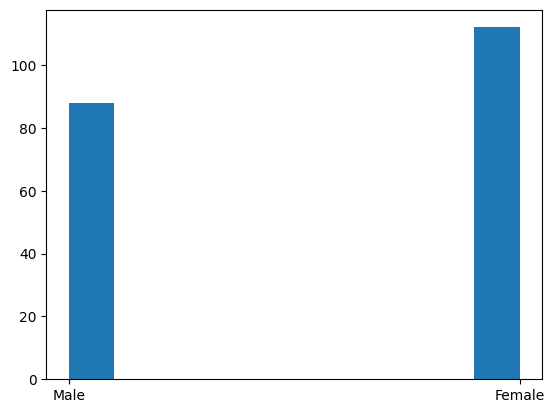

In [ ]:
plt.hist(df['Gender'])
plt.show()

1st observation: female are more likely to shop than male

Analyze behaviours based on Age

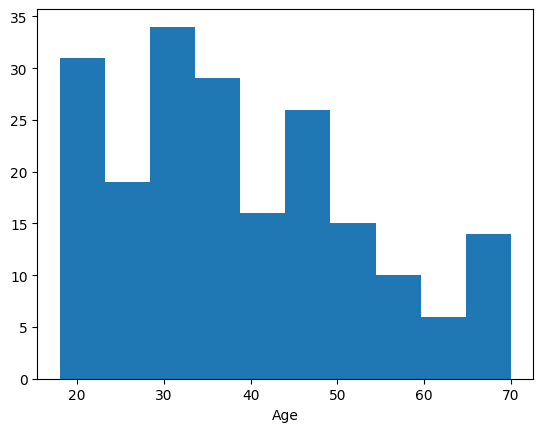

In [ ]:
plt.hist(df['Age'])
plt.xlabel("Age")
plt.show()

Lets see how Annual Income is Distributed

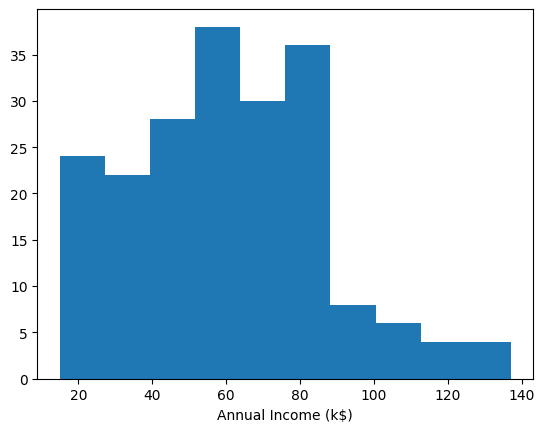

In [ ]:
plt.hist(df['Annual Income (k$)'])
plt.xlabel("Annual Income (k$)")
plt.show()

In [ ]:
import seaborn as sns

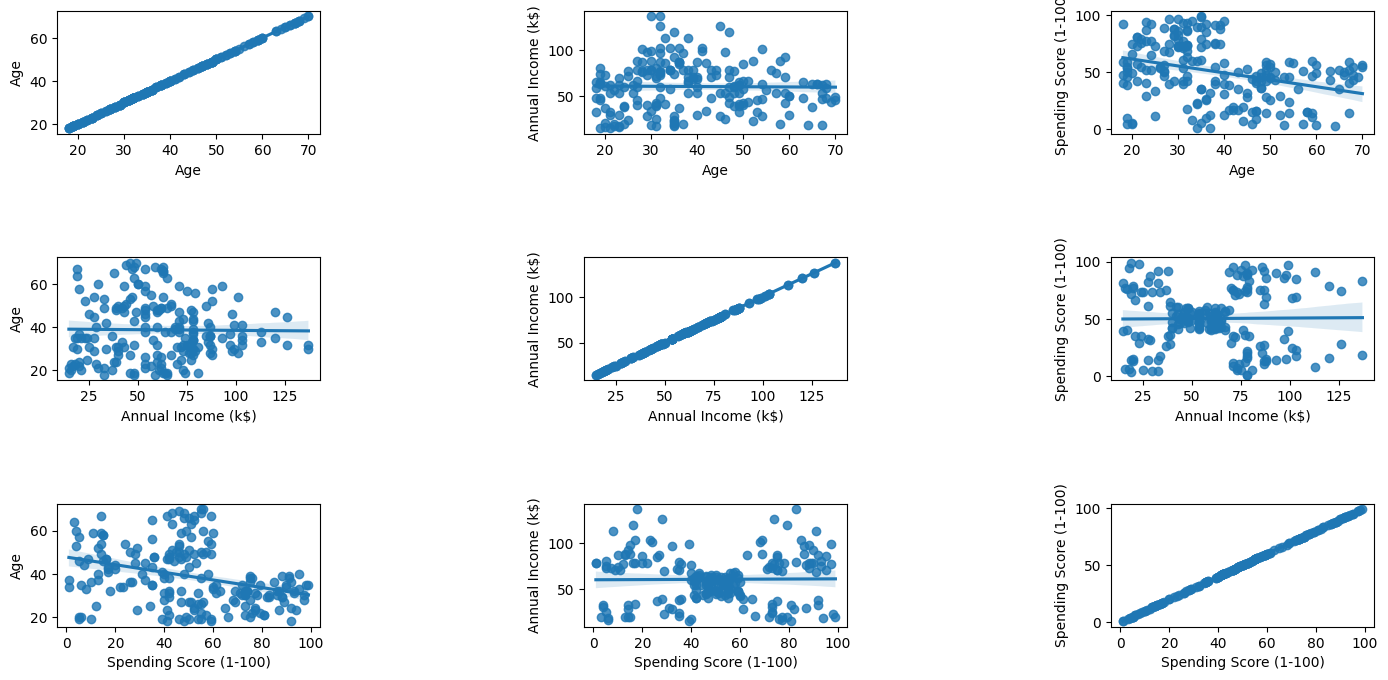

In [ ]:
plt.figure(1 ,figsize = (17 , 8))
n = 0
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace=1,wspace=1)
        sns.regplot(x=x,y=y,data=df)
        plt.ylabel(y)
plt.show()

**Observations:**
1. with increase in age there is no change in annual income (subplot-[1,2]).
2. with increase in age there is decrease in spending score (subplot-[1,3]).
3. observing subplot-[2,3] conclusions can be,
   - annual income < 37.5(k$) and > ~70(k$) has either category of more spending and less spending customers.
   - people of annual income in between [37.5(k$), ~70(k$)] exhibit very similar behaviour in spending money.

In [ ]:
from sklearn.cluster import KMeans

**K-means clustering using 2 dimensions**


Age,spending score be the dimensions taken under consideration to from clusters.

K value is not defined. Lets calculate WSS for all values of k<=10. WSS stands for Within Cluster Sum of Squared Errors.

In [ ]:
X = df[['Age','Spending Score (1-100)']].iloc[: , :].values

In [ ]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

To avoid underfitting and overfitting, lets plot the graph to get the number that avoids these extremes.

In [ ]:
import numpy as np

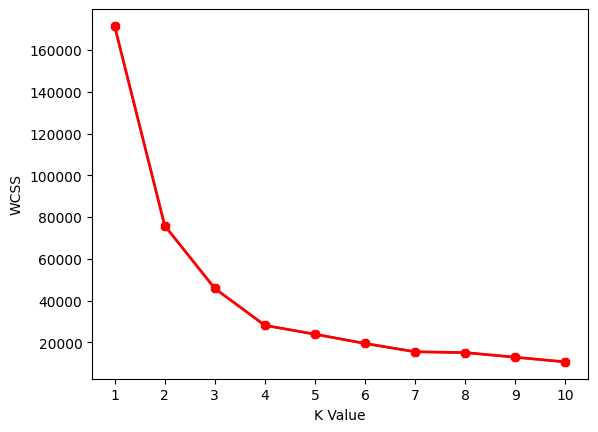

In [ ]:

plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

**Observations:**
k<4 gives underfitting
k>4 gives overfitting
Lets choose k=4 to avoid above extremes.

In [ ]:
km1=KMeans(n_clusters=4)
#Fitting the input data
km1.fit(X)
y=km1.predict(X)
#adding the labels to a column named label
df["label"] = y
#The new dataframe with the clustering done
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,2


Lets do the same with another pair: Annual income,spending score be the dimensions taken under consideration to from clusters

In [ ]:
X = df[['Annual Income (k$)','Spending Score (1-100)']].iloc[: , :].values
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

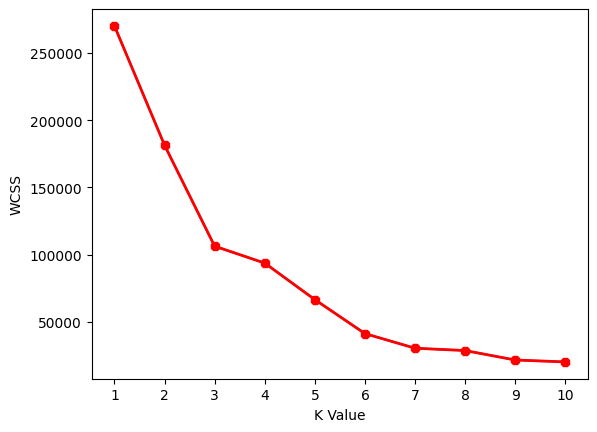

In [ ]:
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

**Observations:**
k<5 gives underfitting. k>5 gives overfitting. Lets choose k=5 to avoid above extremes.

In [ ]:
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
y=km1.predict(X)
#adding the labels to a column named label
df["label1"] = y
#The new dataframe with the clustering done
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label,label1
0,1,Male,19,15,39,2,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,2,3


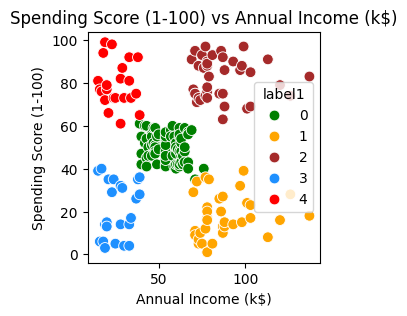

In [ ]:
#Scatterplot of the clusters
plt.figure(figsize=(3,3))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label1",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df  ,s = 60 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

Lets form 3D cluster **plot**

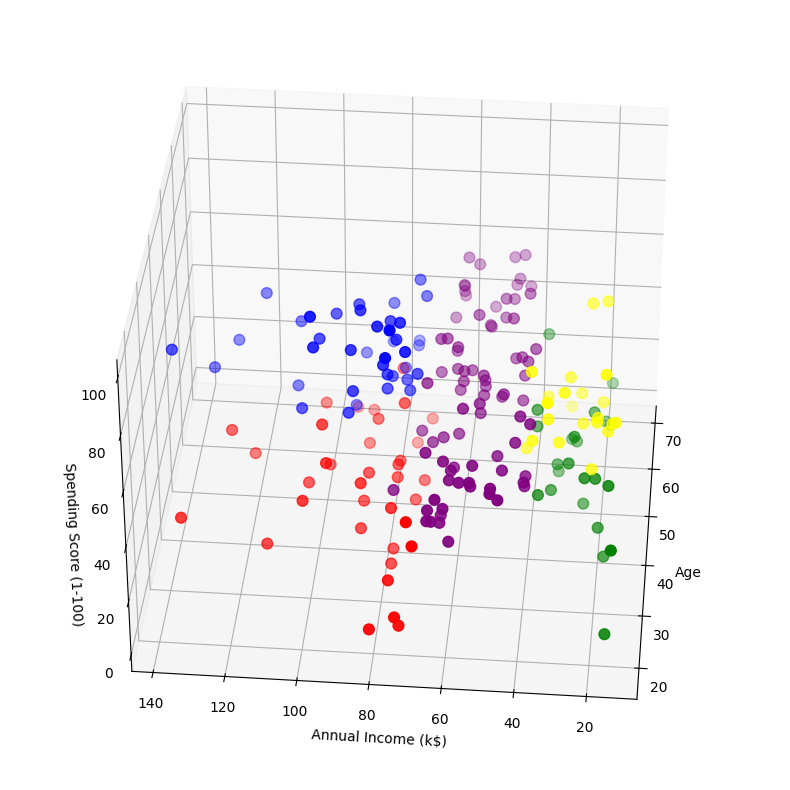

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label1 == 0], df["Annual Income (k$)"][df.label1 == 0], df["Spending Score (1-100)"][df.label1 == 0], c='purple', s=60)
ax.scatter(df.Age[df.label1 == 1], df["Annual Income (k$)"][df.label1 == 1], df["Spending Score (1-100)"][df.label1 == 1], c='red', s=60)
ax.scatter(df.Age[df.label1 == 2], df["Annual Income (k$)"][df.label1 == 2], df["Spending Score (1-100)"][df.label1 == 2], c='blue', s=60)
ax.scatter(df.Age[df.label1 == 3], df["Annual Income (k$)"][df.label1 == 3], df["Spending Score (1-100)"][df.label1 == 3], c='green', s=60)
ax.scatter(df.Age[df.label1 == 4], df["Annual Income (k$)"][df.label1 == 4], df["Spending Score (1-100)"][df.label1 == 4], c='yellow', s=60)
ax.view_init(35, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()